In [ ]:
pip install qiskit

In [ ]:
pip install matplotlib

In [5]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

def adder(a,b):
    a = a%2
    b = b%2
    # Create Circuit with 4 qubits and two registers
    qc =QuantumCircuit(4,2)
    
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)
        
    qc.barrier()
    
    # Compute first digit
    qc.cx(0,2)
    qc.cx(1,2)
    
    # Compute secon digit
    
    qc.ccx(0,1,3)
    
    qc.barrier()
    
    qc.measure(2,0) # Writes the first digit to the first register
    qc.measure(3,1) # Write the secon digit to the second register
    
    return qc

def run_circuit(qc):
    sim = Aer.get_backend('aer_simulator') 
    result = sim.run(qc,shots=200).result()
    counts = result.get_counts()
    return counts

In [2]:
adder(1,1).draw(initial_state = True)

┌───┐ ░                 ░       
q_0: |0>┤ X ├─░───■─────────■───░───────
        ├───┤ ░   │         │   ░       
q_1: |0>┤ X ├─░───┼────■────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├──┼───░─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: |0>──────░───────────┤ X ├─░──╫─┤M├
              ░           └───┘ ░  ║ └╥┘
 c: 0 2/═══════════════════════════╩══╩═
                                   0  1

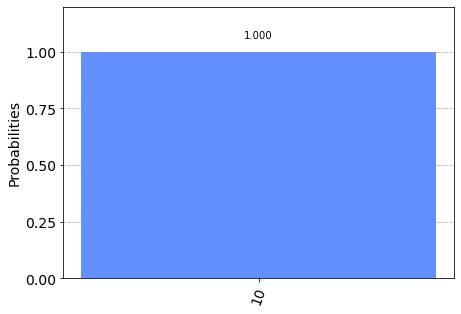

In [5]:
plot_histogram(run_circuit(adder(1,1)))

In [6]:
run_circuit(adder(0,1))

{'01': 200}